In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tw
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection   import train_test_split
from sklearn.datasets import make_circles
import seaborn as sn
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

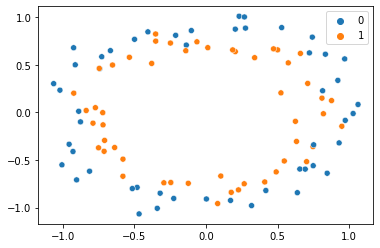

In [2]:
x, y = make_circles(n_samples = 100, noise = 0.1, random_state = 1)
sn.scatterplot(x[:, 0], x[:, 1], hue = y)

In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [4]:
model = Sequential()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

2022-12-28 00:08:49.110995: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
traininglog =  model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 666, verbose = 1)

2022-12-28 00:08:49.299074: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/666
3/3 [==============================] - 1s 122ms/step - loss: 0.6989 - accuracy: 0.4750 - val_loss: 0.6957 - val_accuracy: 0.4000
Epoch 2/666
3/3 [==============================] - 0s 20ms/step - loss: 0.6954 - accuracy: 0.5125 - val_loss: 0.6951 - val_accuracy: 0.6000
Epoch 3/666
3/3 [==============================] - 0s 19ms/step - loss: 0.6948 - accuracy: 0.4875 - val_loss: 0.6970 - val_accuracy: 0.3500
Epoch 4/666
3/3 [==============================] - 0s 20ms/step - loss: 0.6926 - accuracy: 0.4625 - val_loss: 0.6993 - val_accuracy: 0.4000
Epoch 5/666
3/3 [==============================] - 0s 20ms/step - loss: 0.6914 - accuracy: 0.5625 - val_loss: 0.7006 - val_accuracy: 0.4000
Epoch 6/666
3/3 [==============================] - 0s 21ms/step - loss: 0.6905 - accuracy: 0.5375 - val_loss: 0.7021 - val_accuracy: 0.4000
Epoch 7/666
3/3 [==============================] - 0s 21ms/step - loss: 0.6899 - accuracy: 0.5500 - val_loss: 0.7047 - val_accuracy: 0.4000
Epoch 8/666
3/3 [==

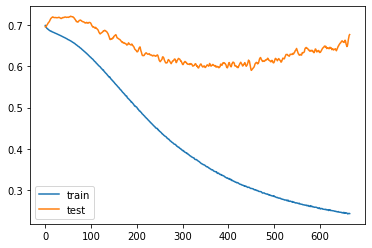

In [6]:
plt.plot(traininglog.history['loss'], label = 'train')
plt.plot(traininglog.history['val_loss'], label = 'test')
plt.legend()
plt.show()

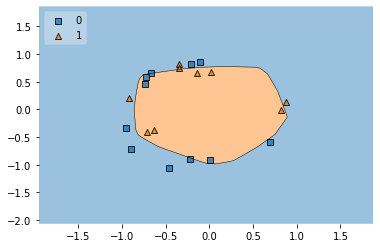

In [7]:
plot_decision_regions(xtest, ytest.ravel(), clf = model, legend = 2)
plt.show()

In [8]:
model = Sequential()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

callback = EarlyStopping( monitor = 'val_loss',
                          min_delta = 0.0001,
                        patience = 76,
                        verbose = 1,
                        mode = 'auto',
                        baseline = None,
                        restore_best_weights = False
                        )

traininglog =  model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 666, callbacks = callback)

Epoch 1/666
3/3 [==============================] - 1s 92ms/step - loss: 0.6968 - accuracy: 0.4750 - val_loss: 0.6921 - val_accuracy: 0.4000
Epoch 2/666
3/3 [==============================] - 0s 18ms/step - loss: 0.6940 - accuracy: 0.4625 - val_loss: 0.6964 - val_accuracy: 0.4500
Epoch 3/666
3/3 [==============================] - 0s 18ms/step - loss: 0.6924 - accuracy: 0.4750 - val_loss: 0.6981 - val_accuracy: 0.3500
Epoch 4/666
3/3 [==============================] - 0s 18ms/step - loss: 0.6908 - accuracy: 0.5250 - val_loss: 0.7013 - val_accuracy: 0.4000
Epoch 5/666
3/3 [==============================] - 0s 18ms/step - loss: 0.6896 - accuracy: 0.5625 - val_loss: 0.7040 - val_accuracy: 0.4000
Epoch 6/666
3/3 [==============================] - 0s 18ms/step - loss: 0.6888 - accuracy: 0.5625 - val_loss: 0.7059 - val_accuracy: 0.4000
Epoch 7/666
3/3 [==============================] - 0s 18ms/step - loss: 0.6874 - accuracy: 0.5625 - val_loss: 0.7067 - val_accuracy: 0.4000
Epoch 8/666
3/3 [===

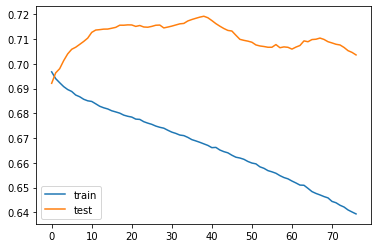

In [10]:
plt.plot(traininglog.history['loss'], label = 'train')
plt.plot(traininglog.history['val_loss'], label = 'test')
plt.legend()
plt.show()